# <center>Análisis de datos exploratorios (EDA)</center>
## <center>**`Proyecto individual STEAM`** </center>

---

### Se importan las librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud
from math import sqrt
from numpy import mean

In [2]:
# Rutas de ubicación para los datasets:
ruta_reviews = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_reviews.csv'
ruta_items = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_items.csv'
ruta_games = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_games.csv'

---

### Se analiza el Data Set de Reviews 

In [4]:
# Se crea el primer Data Frame llamado "df_reviews"
df_reviews = pd.read_csv(ruta_reviews)
df_reviews.head()

,User_Id,Item_Id,Recommend,Year,Date,Sentiment_Analysis
0,76561197970982479,1250,True,2011,2011-11-05,2
1,76561197970982479,22200,True,2011,2011-07-15,2
2,76561197970982479,43110,True,2011,2011-04-21,2
3,js41637,251610,True,2014,2014-06-24,2
4,js41637,227300,True,2013,2013-09-08,2


In [6]:
# Se observa su información general
print(df_reviews.info())
print(f'El tamaño del DataFrame es de {df_reviews.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_Id             59305 non-null  object
 1   Item_Id             59305 non-null  int64 
 2   Recommend           59305 non-null  bool  
 3   Year                59305 non-null  int64 
 4   Date                59305 non-null  object
 5   Sentiment_Analysis  59305 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 2.3+ MB
None
El tamaño del DataFrame es de (59305, 6)


#### Se establecen las variables la cuales van a ser analizadas en el procesado de este Data Set, se van a ignorar de cierta manera los campos “User_Id” e “Item_Id” ya que estos contienen identificadores del sistema STEAM pero de igual manera se les dará un vistazo, la variable “Date” no es relevante para las consignas así que no se entrara a analizar , las variables numéricas que se analizaran en este caso serán dos “Year” y “Sentiment_Analysis”, finalmente la única variable categórica será “Recommend”. 

##### Variables identificadores “User_Id” e“Item_Id” 

In [17]:
# Se crea una función para poder realizar visualizaciones de Tops de cualquier variable  
def plot_top_values(column, top_n=10):
    # Asegurarse de que la columna sea de tipo numérico o string
    if not pd.api.types.is_numeric_dtype(column) and not pd.api.types.is_string_dtype(column):
        try:
            column = column.astype(str)
        except:
            raise ValueError("La columna no es de tipo numérico o string y no se puede convertir.")

    # Obtener los top valores
    top_values = column.value_counts().nlargest(top_n)

    # Crear el gráfico de barras
    plt.figure(figsize=(14, 6))
    sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

    # Añadir etiquetas y título
    plt.title(f'Top {top_n} Valores Más Frecuentes')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

    # Imprimir el gráfico
    plt.show()

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_10360\2388660064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')


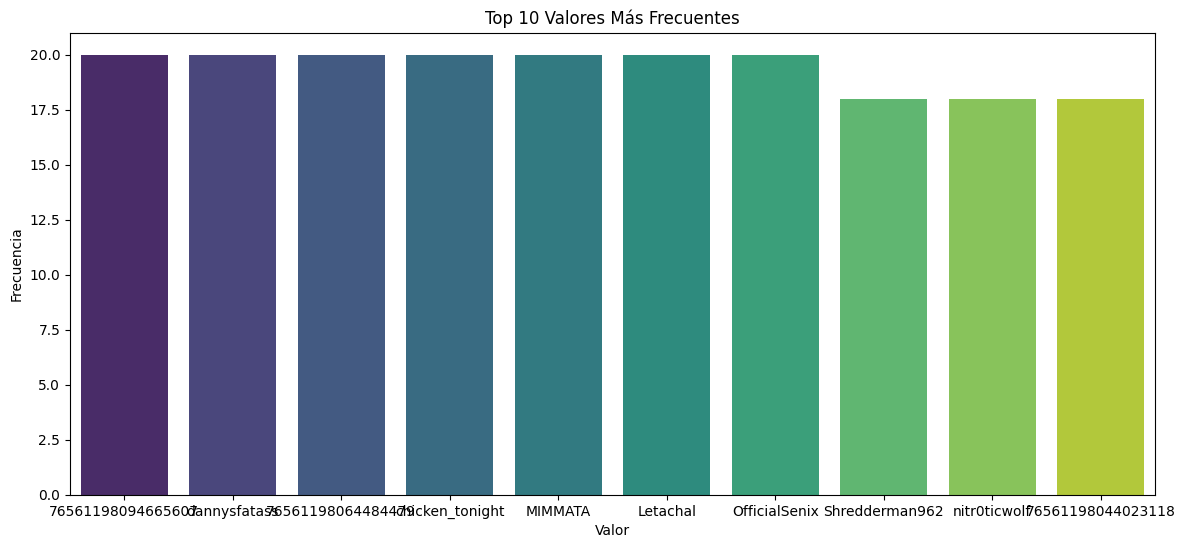

In [33]:
# Se grafica el campo "User_Id" con el Top 10 de usuarios que más reviews dejaron
plot_top_values(df_reviews['User_Id'])

In [40]:
# Se cuentan la cantidad de Usuarios diferentes que hay
df_reviews['User_Id'].unique().shape

(25458,)

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_10360\2388660064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')


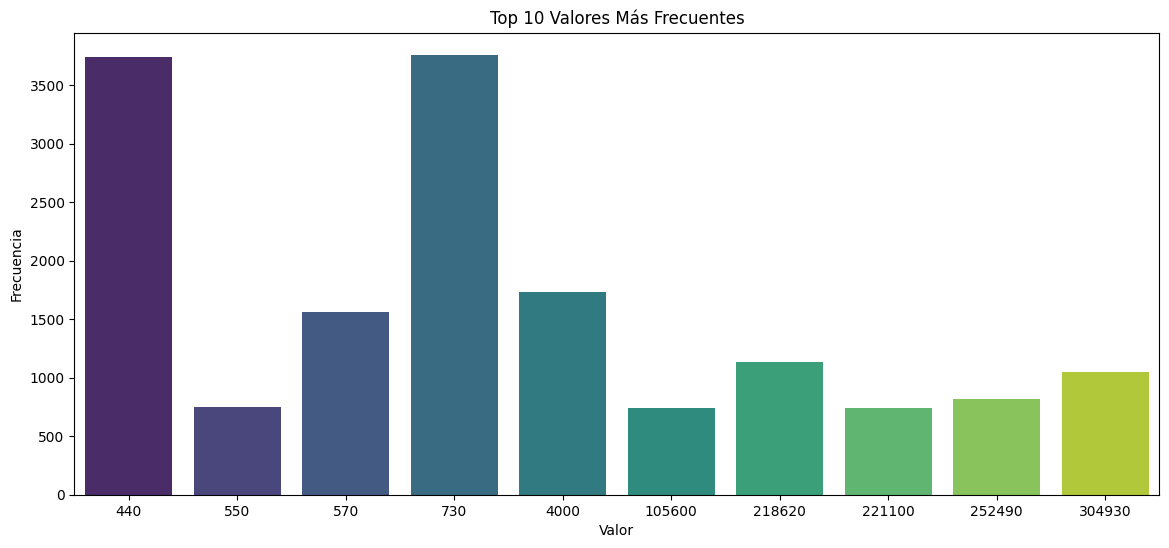

In [34]:
# Se grafica el campo "Item_Id" con el Top 10 de items mas repetidos
plot_top_values(df_reviews['Item_Id'])

In [41]:
# Se cuentan la cantidad de items diferentes que hay
df_reviews['Item_Id'].unique().shape

(3682,)

##### Variable numérica “Year” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_10360\2265263300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df_reviews, palette='viridis')


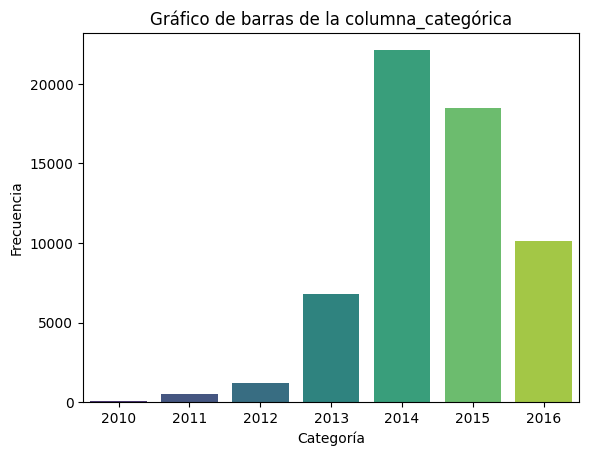

In [8]:
# Se grafica la frecuencia de los años en los que se realizaron las reviews
sns.countplot(x='Year', data=df_reviews, palette='viridis')
plt.title('Gráfico de barras de la columna Year')
plt.xlabel('Año que se realizo la Review')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
# Se contabiliza las cantidades de esas frecuencias 
df_reviews['Year'].value_counts()

Year
2014    22111
2015    18470
2016    10119
2013     6792
2012     1215
2011      532
2010       66
Name: count, dtype: int64

In [13]:
# Se crea una función para optimizar el proceso de visualizar la cantidad de valores únicos y en especial para ver cuanto porcentaje representan  
def porcentajes_valores(columna):
    # Obtener conteo de valores únicos
    conteo_valores = columna.value_counts()

    # Calcular el porcentaje de cada valor
    porcentaje_valores = columna.value_counts(normalize=True) * 100

    # Crear un nuevo DataFrame con los resultados
    analisis_df = pd.DataFrame({
        'Valor único': conteo_valores.index,
        'Cantidad': conteo_valores.values,
        'Porcentaje': porcentaje_valores.values
    })

    return analisis_df

In [14]:
porcentajes_valores(df_reviews['Year'])

,Valor único,Cantidad,Porcentaje
0,2014,22111,37.283534
1,2015,18470,31.144086
2,2016,10119,17.062642
3,2013,6792,11.452660
4,2012,1215,2.048731
5,2011,532,0.897058
6,2010,66,0.111289


>*Se puede observar que el año el año en el que se realizaron más reviews fu el año **`“2014”`**, los tres primeros años desde los que se tiene registro en este DataSet no se realizaron una cantidad considerable de reviews y para finalizar este punto no se puede ser completamente objetivo con la cantidad que expresa el año **`“2016”`** ya que para el momento que se tomó el Data Set aún no se terminaba dicho año.*

##### Variable numérica “Sentiment_Analysis” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_10360\473836566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Analysis', data=df_reviews, palette='viridis')


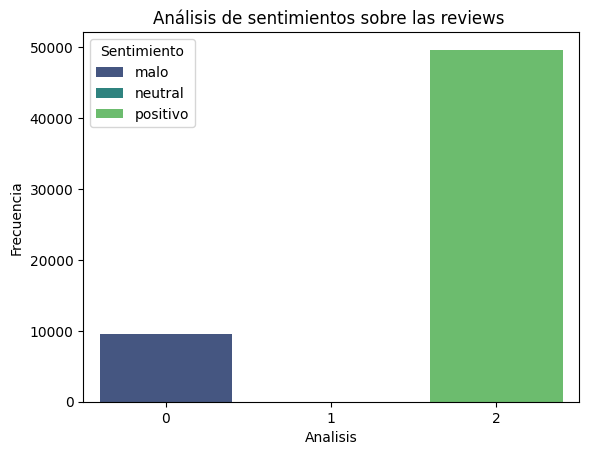

In [11]:
# Se grafica la frecuencia de los sentimientos sobre las reviews
sns.countplot(x='Sentiment_Analysis', data=df_reviews, palette='viridis')
plt.title('Análisis de sentimientos sobre las reviews ')
plt.xlabel('Analisis')
plt.ylabel('Frecuencia')
plt.legend(title='Sentimiento', labels=['malo', 'neutral', 'positivo'])
plt.show()

In [15]:
# Se contabiliza las cantidades de esas frecuencias 
porcentajes_valores(df_reviews['Sentiment_Analysis'])

,Valor único,Cantidad,Porcentaje
0,2,49663,83.741674
1,0,9612,16.207740
2,1,30,0.050586


>*Se encuentra que el sentimiento con mayor presencia en el DataSet es el **`“2”`** que representa el sentimiento **`“positivo”`** superando al sentimiento **`“0”`** ósea el **`“negativo”`** casi por cuatro veces y el sentimiento **`“1”`** que es el sentimiento **`“neutral”`** en este caso tiene casi una minima relevancia solo con una frecuencia de 30 veces. Todo esto quiere decir que en todo el DataSet el sentimiento que más rige e influirá en procesos futuros es el **`“positivo”`**.*

##### Variable categórica “Recommend” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_10360\19714779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommend', data=df_reviews, palette='viridis')


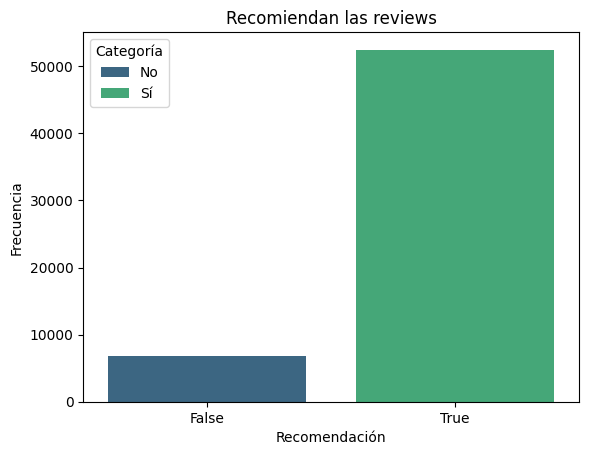

In [20]:
# Se grafica las categorías de las recomendaciones sobre las reviews 
sns.countplot(x='Recommend', data=df_reviews, palette='viridis')
plt.title('Recomiendan las reviews')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', labels=['No', 'Sí'])
plt.show()

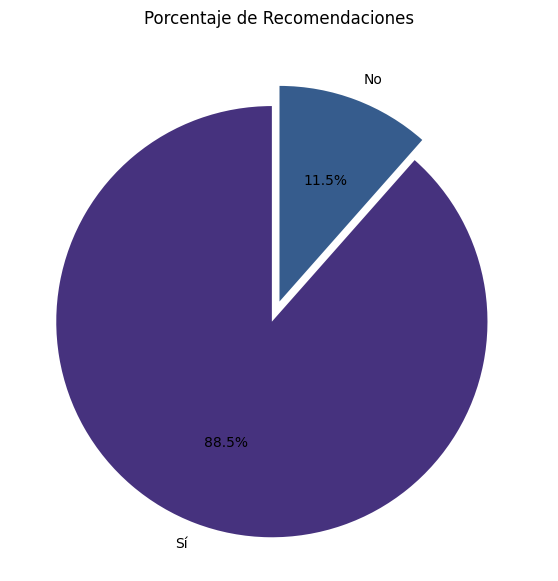

In [21]:
# Se crea un gráfico de torta con representación porcentual  
plt.figure(figsize=(7, 7))
labels = ['Sí', 'No']
sizes = df_reviews['Recommend'].value_counts(normalize=True) * 100  # Calcula el porcentaje
colors = sns.color_palette('viridis')
explode = (0.1, 0)  # Resalta la primera categoría (opcional)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Porcentaje de Recomendaciones')
plt.show()

In [22]:
# Se contabiliza las cantidades de esas frecuencias 
porcentajes_valores(df_reviews['Recommend'])

,Valor único,Cantidad,Porcentaje
0,True,52473,88.479892
1,False,6832,11.520108


>*Se puede observar que el **`“85.5%”`** de las reviews son recomendadas por los demás usuarios siendo esto otra métrica útil para los futuros procesos.*

En este Data Set es importante resaltar que no contiene valores **“outliers”** por que en el proceso de ETL se normalizo lo máximo posible y aunque hay variables numéricas todas se podrían definir como variables que categorizan en algo, tal como el **“año”**, **“Sí”** o **“No”**, **“bueno”** o **“malo”**. Se encuentra además que del total de registros hay solamente **“25458”** únicos en **“User_Id”** osea diferentes usuarios y que también hay **“3682”** registros únicos en el campo de **“Item_Id”** indicando que muchos usuarios dejan sus reviews sobre pocos juegos en comparación. Así que de esta manera se define este Data Set mencionando que por un punto para optimizar se puede prescindir del campo **“Date”** en el siguiente paso que sería para las consultas ya que este campo no es necesario para estas. 

---

### Se analiza el Data Set de Items

In [3]:
# Se crea el primer Data Frame llamado "df_items"
df_items = pd.read_csv(ruta_items)
df_items.head()

,User_Id,Items_Count,Steam_Id,Item_Id,Item_Name,Playtime_Forever_Hours
0,76561197970982479,277,76561197970982479,10,Counter-Strike,1
1,76561197970982479,277,76561197970982479,30,Day of Defeat,1
2,76561197970982479,277,76561197970982479,300,Day of Defeat: Source,79
3,76561197970982479,277,76561197970982479,240,Counter-Strike: Source,31
4,76561197970982479,277,76561197970982479,3830,Psychonauts,6


In [4]:
# Se observa su información general
print(df_items.info())
print(f'El tamaño del DataFrame es de {df_items.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   User_Id                 object
 1   Items_Count             int64 
 2   Steam_Id                int64 
 3   Item_Id                 int64 
 4   Item_Name               object
 5   Playtime_Forever_Hours  int64 
dtypes: int64(4), object(2)
memory usage: 150.4+ MB
None
El tamaño del DataFrame es de (3285246, 6)


#### Se establecen las variables a ser analizadas en este segundo proceso de EDA, se van a ignorar los campos "User_Id" y "Steam_Id" ya que estas contienen identificadores del sistema STEAM, como variables numéricas se van a considerar los campo "Items_Count", "Item_Id" y "Playtime_Forever_Hours" y finalmente la única variable categórica será "Item_Name".

##### Variable númerica “Item_Id” 

In [5]:
# Se filtra a un nuevo Data Frame estos campos para tener solamente valores únicos de "Items_Count"
items_count = df_items[['User_Id', 'Items_Count']].drop_duplicates()
items_count.head()

,User_Id,Items_Count
0,76561197970982479,277
198,js41637,888
717,evcentric,137
821,Riot-Punch,328
951,doctr,541


In [6]:
# Se observa su tamaño
items_count.shape

(68403, 2)

In [7]:
items_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68403 entries, 0 to 3285241
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_Id      68403 non-null  object
 1   Items_Count  68403 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


Se busca como están distribuidos los valores de los Items de los usuarios  

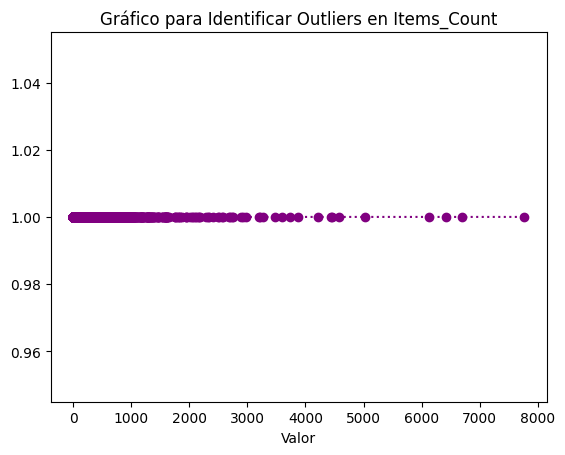

In [8]:
# Se crea una coolumna que contiene solamente los valores de 'Items_Count'
columna_items = items_count['Items_Count']
# Se ordena la columna para tener una línea recta
columna_numerica_sorted = columna_items.sort_values()

# Se crea el gráfico de línea
plt.plot(columna_numerica_sorted, [1] * len(columna_numerica_sorted), marker='o', linestyle=':', color='purple')

# Se añade etiquetas y título
plt.title('Gráfico para Identificar Outliers en Items_Count')
plt.xlabel('Valor')
plt.ylabel('')

# Se muestra el gráfico
plt.show()

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_3172\1856953138.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


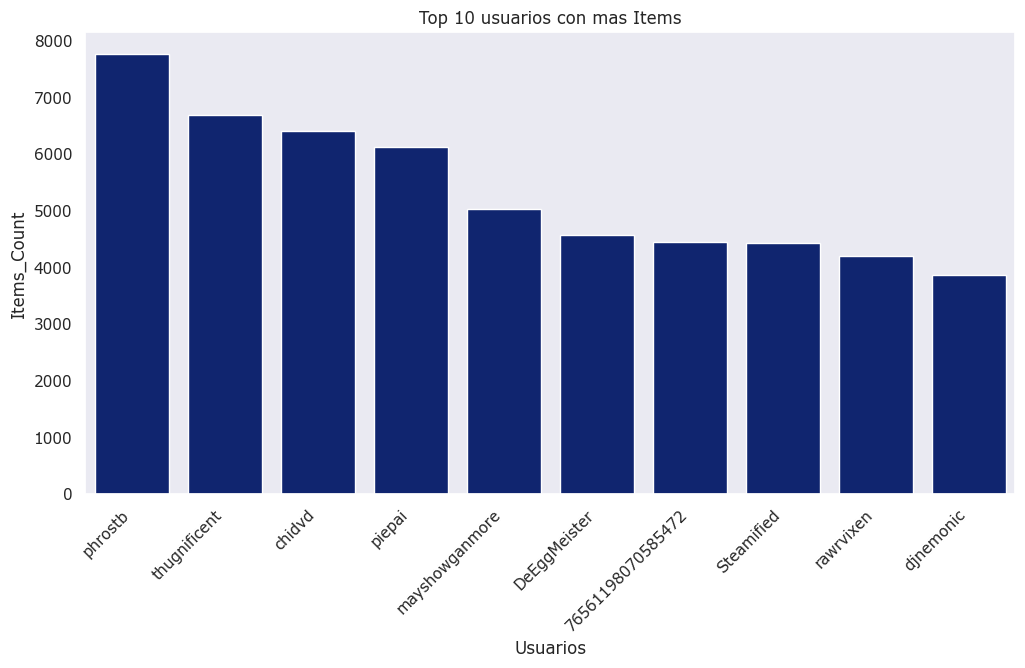

In [9]:
# Se filtra a una nueva variable donde solo esten los Top 10
items_count_top10 = items_count.sort_values(by='Items_Count', ascending=False).head(10)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top10['User_Id'],y=items_count_top10['Items_Count'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 usuarios con mas Items')
plt.xlabel('Usuarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*Se puede evidenciar que la mayoría de los usuarios tienen menos de **`“3000”`** Items asociados a su cuenta Steam mientras que algunos tienen una cantidad superior a **`“5000”`** lo que podría considerarse valores atípicos.* 

##### Variables "Item_Name" y "Playtime_Forever_Hours"

Se crea una nube de palabras con el campo “Item_Name” para tener una idea de cual se repite mas  

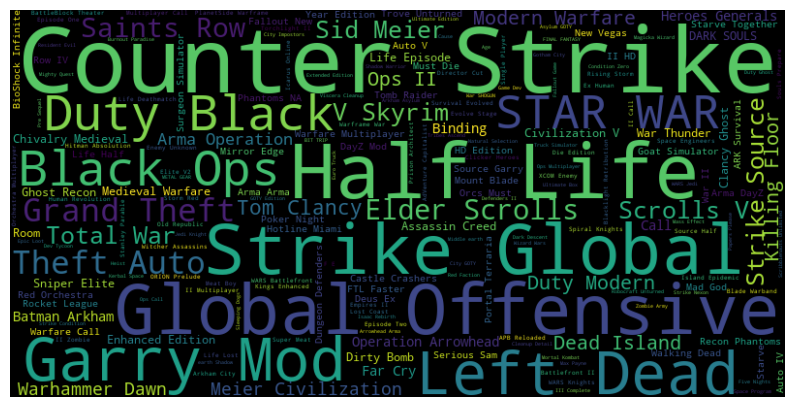

In [28]:
text = ' '.join(df_items['Item_Name'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Se filtra a un nuevo Data Frame estos campos para tener únicos de "Item_Name" y las horas acumuladas jugadas a ese Item
items_hours = df_items.groupby(['Item_Name', 'Item_Id'], as_index=False)['Playtime_Forever_Hours'].sum()
items_hours.head()

,Item_Name,Item_Id,Playtime_Forever_Hours
0,神明的一天世界(God's One Day World),490390,117
1,! That Bastard Is Trying To Steal Our Gold !,449940,14
2,"""Glow Ball"" - The billiard puzzle game",388390,7
3,#SelfieTennis,392190,7
4,#killallzombies,303720,22


In [11]:
# Se visualiza el tamaño del nuevo Data Frame
items_hours['Playtime_Forever_Hours'].value_counts().shape

(2544,)

In [12]:
items_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Item_Name               10050 non-null  object
 1   Item_Id                 10050 non-null  int64 
 2   Playtime_Forever_Hours  10050 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 235.7+ KB


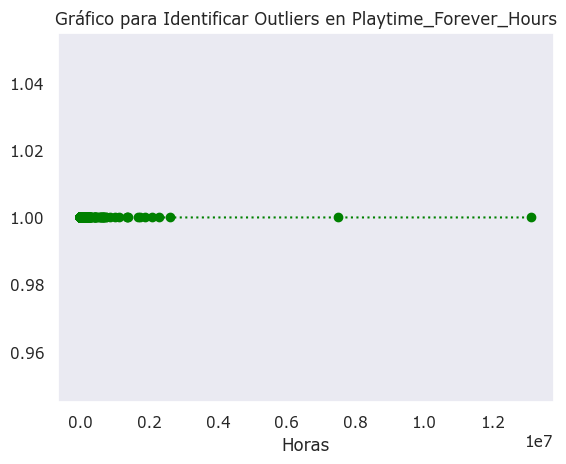

In [13]:
# Se crea una coolumna que contiene solamente los valores de 'Items_hours'
columna_hours = items_hours['Playtime_Forever_Hours']
# Se ordena la columna para tener una línea recta
columna_numerica_sorted = columna_hours.sort_values()

# Se crea el gráfico de línea
plt.plot(columna_numerica_sorted, [1] * len(columna_numerica_sorted), marker='o', linestyle=':', color='green')

# Se añade etiquetas y título
plt.title('Gráfico para Identificar Outliers en Playtime_Forever_Hours')
plt.xlabel('Horas')
plt.ylabel('')

# Se muestra el gráfico
plt.show()

>*Se identifican dos valores que se alejan bastante de la mayoría de los datos así que se procede a verlos específicamente.*

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_3172\405406698.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


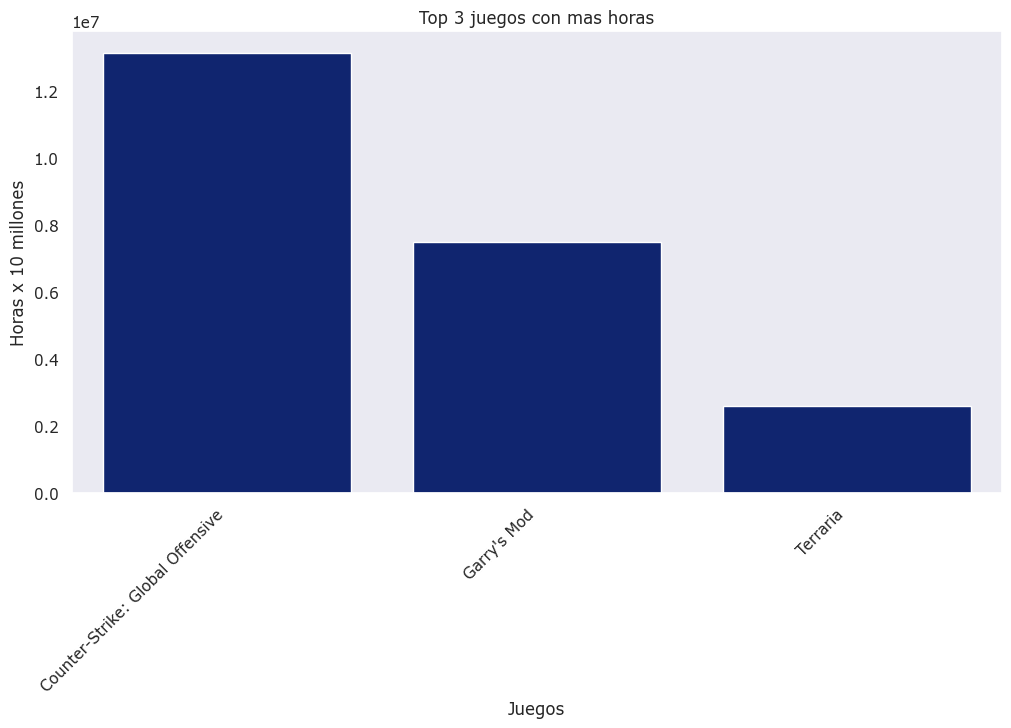

In [23]:
# Se filtra a una nueva variable donde solo esten los Top 3
items_count_top3 = items_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).head(3)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top3['Item_Name'],y=items_count_top3['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 3 juegos con mas horas')
plt.xlabel('Juegos')
plt.ylabel('Horas x 10 millones')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*Esta grafica muestra los 3 juegos con más horas jugadas el primero acumula más **`“Doce millones de horas en total”`** y el segundo más de **`“Siete millones”`**, estos jugos son muy populares y han sido juegos activos desde que salieron hasta hoy en día, por lo cual se hace sentido que hayan sido detectados como valores atípicos, pero estos están correctos. También hay que destacar que estos datos empiezan a dar indicios de cuáles son las preferencias de los usuarios.*

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_3172\1415355538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


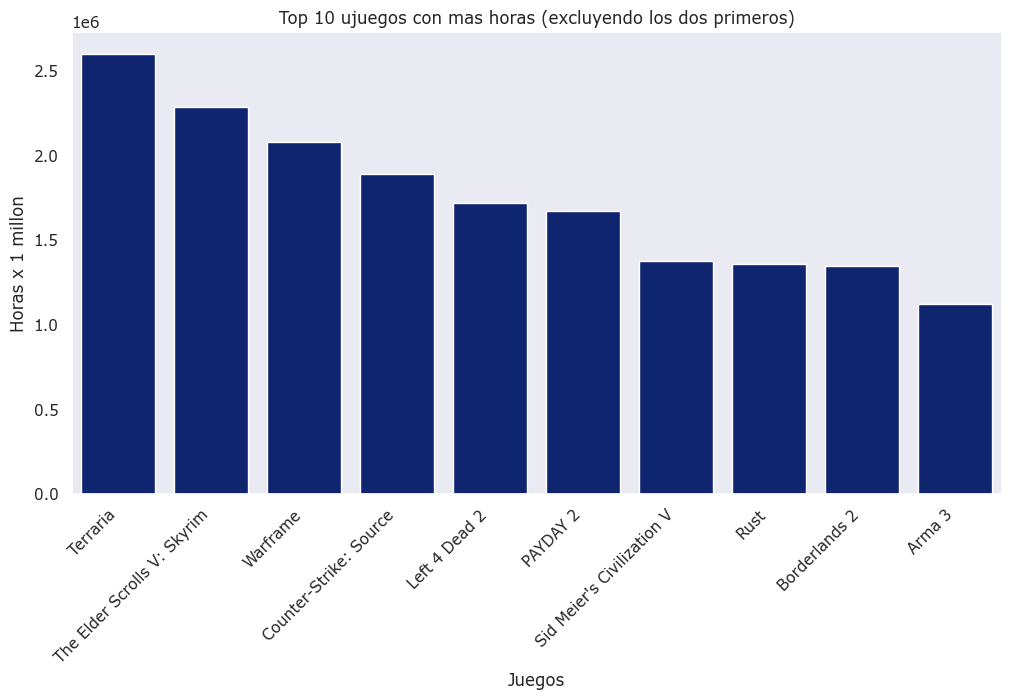

In [24]:
items_count_top10 = items_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).iloc[2:12]

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top10['Item_Name'],y=items_count_top10['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 ujuegos con mas horas (excluyendo los dos primeros)')
plt.xlabel('Juegos')
plt.ylabel('Horas x 1 millon')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*En la gráfica anterior se puede apreciar de mejor manera un Top de los juegos con más horas excluyendo a los dos más altos del Top.*

##### Variables "User_Id" y "Playtime_Forever_Hours"

In [27]:
# Se filtra a un nuevo Data Frame estos campos para tener únicos de "User_Id" y las horas acumuladas jugadas a ese Usuario
users_hours = df_items.groupby(['User_Id'], as_index=False)['Playtime_Forever_Hours'].sum()
users_hours.head()

,User_Id,Playtime_Forever_Hours
0,--000--,2377
1,--ace--,1190
2,--ionex--,815
3,-2SV-vuLB-Kg,923
4,-404PageNotFound-,3914


In [29]:
# Se visualiza el tamaño del nuevo Data Frame
users_hours.value_counts().shape

(68403,)

In [30]:
users_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68403 entries, 0 to 68402
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User_Id                 68403 non-null  object
 1   Playtime_Forever_Hours  68403 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


Se crea un gráfico de tipo boxplot para buscar valores anormales 

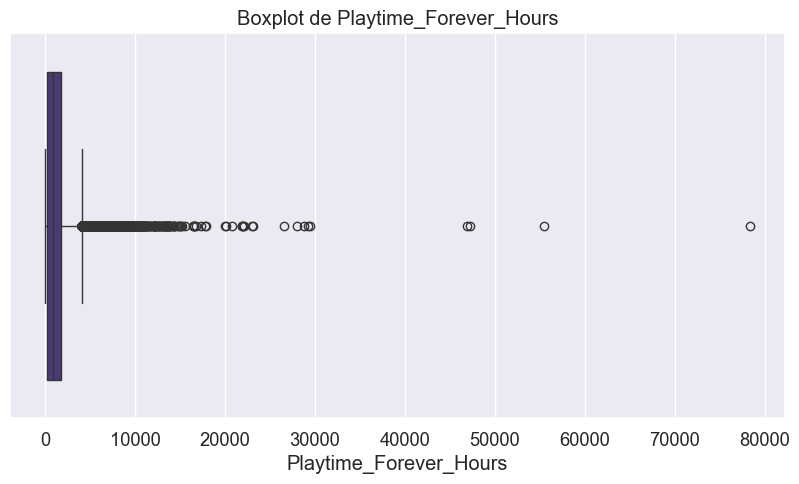

In [32]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 5))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el boxplot
sns.boxplot(x=users_hours['Playtime_Forever_Hours'])

# Se añade etiquetas y título
plt.title('Boxplot de Playtime_Forever_Hours')
plt.xlabel('Playtime_Forever_Hours')

# Se muestra el gráfico
plt.show()

Se hace lo mismo con un gráfico de tipo violinplot pero este no aporta mucha más información 

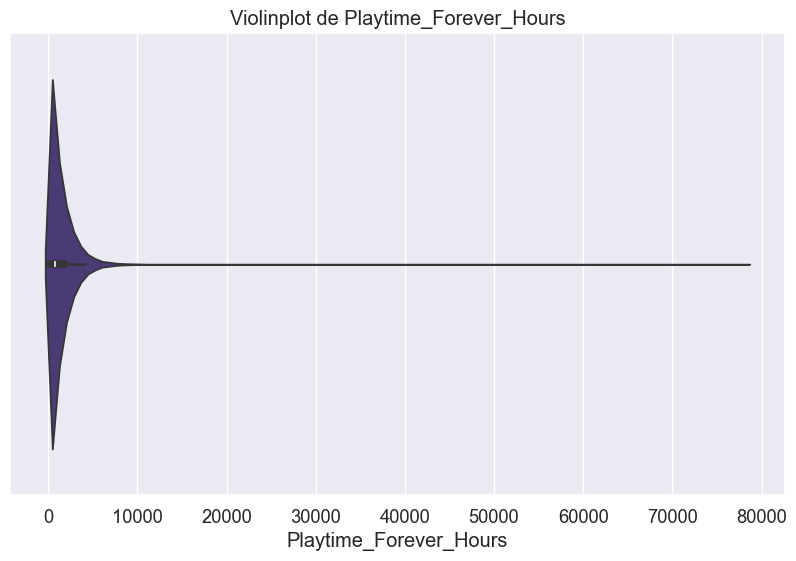

In [33]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el violinplot
sns.violinplot(x=users_hours['Playtime_Forever_Hours'])

# Se añade etiquetas y título
plt.title('Violinplot de Playtime_Forever_Hours')
plt.xlabel('Playtime_Forever_Hours')

# Se muestra el gráfico
plt.show()

Se crea un gráfico de barras con el Top 10 de jugadores con más horas jugadas 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_3172\3611669091.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


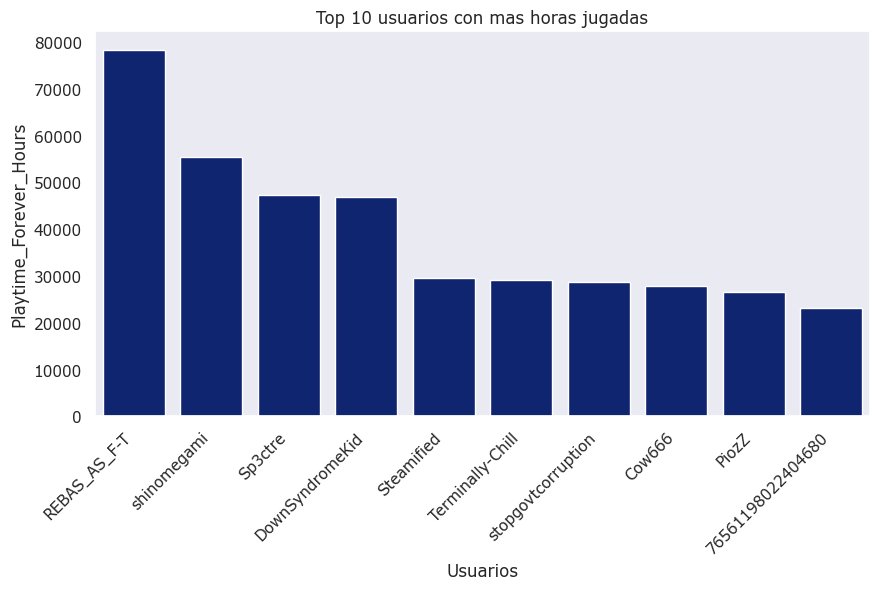

In [36]:
# Se filtra a una nueva variable donde solo esten los Top 10
users_count_top10 = users_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).head(10)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(10, 5))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=users_count_top10['User_Id'],y=users_count_top10['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 usuarios con mas horas jugadas')
plt.xlabel('Usuarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*En base a los anteriores gráficos se puede asumir que los valores atípicos de las horas jugadas por cierta cantidad de usuarios se pueden atribuir a que primero es la suma de varios juegos y segundo que es muy probable que esas horas se hagan en cuentas de usuarios que las comparten o dejan el juego corriendo de manera indeterminada en sus dispositivos.*

In [37]:
# Se filtra a un nuevo Data Frame estos campos para tener solamente valores únicos de "Items_Count"
relacion_items_horas = df_items.groupby(['User_Id', 'Items_Count'], as_index=False)['Playtime_Forever_Hours'].sum()
relacion_items_horas.head()

,User_Id,Items_Count,Playtime_Forever_Hours
0,--000--,58,2377
1,--ace--,44,1190
2,--ionex--,23,815
3,-2SV-vuLB-Kg,68,923
4,-404PageNotFound-,149,3914


---

In [14]:
# text = ' '.join(df_reviews['User_Id'].astype(str))

# wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [15]:
# Unir todos los valores de la columna 'User_Id' en un solo texto
# text = ' '.join(df_reviews['User_Id'].astype(str).drop_duplicates())

# Crear la nube de palabras
# wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42, collocations=False).generate(text)
 
# Configurar la visualización de la nube de palabras
# plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
# plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
# plt.axis('off')  # No mostrar ejes
# plt.show()  # Mostrar la figura